# Using sklearn to see pruning effect on trees

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

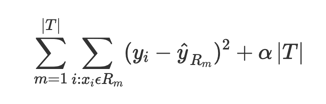

In [ ]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

Text(0, 0.5, 'total impurity of leaves')

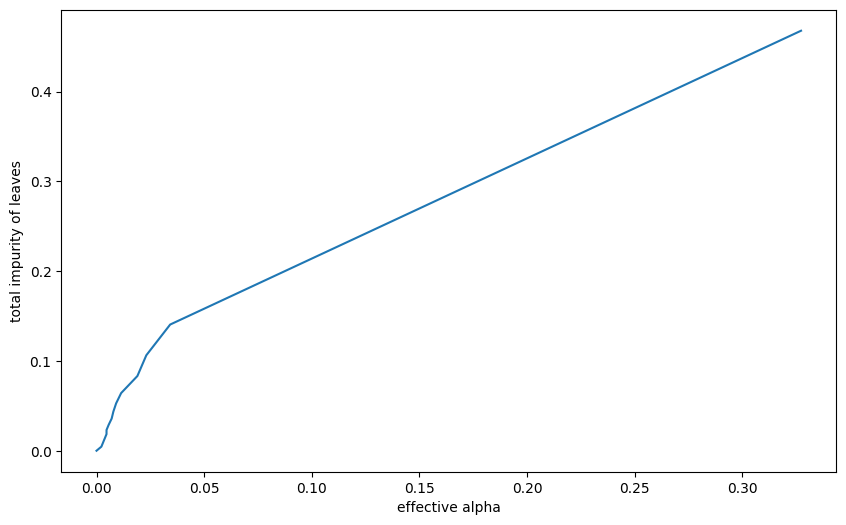

In [ ]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

Finding an optimal value of alpha using Python

In [ ]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

As we already know that there is a strong relation between, alpha and the depth of the tree. We can find the relation using this plot.

Text(0, 0.5, 'total depth')

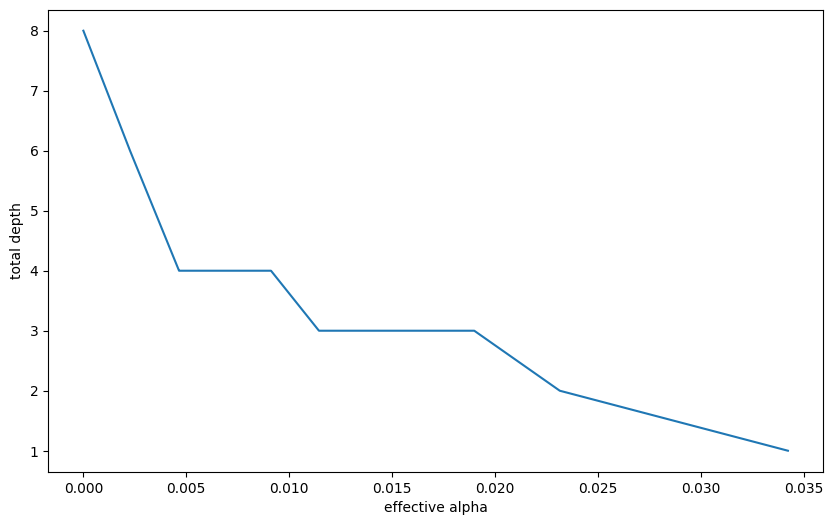

In [ ]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Use the following code to find the relation between alpha and accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

We can clearly see that somewhere around 0.013 alpha, we get a very good value of accuracy.

# Tuning randomization in sklearn.ensemble

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import ShuffleSplit, validation_curve

import numpy as np

# Validation of max_features, controlling randomness in forests
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

_, test_scores = validation_curve(
    RandomForestRegressor(n_estimators=100, n_jobs=-1),
    X,
    y,
    cv=ShuffleSplit(n_splits=10, test_size=0.25),
    param_name="max_features",
    param_range=param_range,
    scoring="neg_mean_squared_error")

test_scores_mean = np.mean(-test_scores, axis=1)
plt.plot(param_range, test_scores_mean, label="RF", color="g")

_, test_scores = validation_curve(
    ExtraTreesRegressor(n_estimators=100, n_jobs=-1),
    X,
    y,
    cv=ShuffleSplit(n_splits=10, test_size=0.25),
    param_name="max_features",
    param_range=param_range,
    scoring="neg_mean_squared_error")

test_scores_mean = np.mean(-test_scores, axis=1)
plt.plot(param_range, test_scores_mean, label="ETs", color="r")

plt.show()
print("MSE vs Max_features")


# Careful tunning required for GBRT

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit, validation_curve, GridSearchCV
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)

# Careful tuning is required to obtained good results
param_grid = {
    "loss": ["mse", "lad", "huber"],
    "learning_rate": [0.1, 0.01, 0.001],
    "max_depth": [3, 5, 7],
    "min_samples_leaf": [1, 3, 5],
    "subsample": [1.0, 0.9, 0.8]
}

est = GradientBoostingRegressor(n_estimators=1000)

grid = GridSearchCV(
    est,
    param_grid,
    cv=ShuffleSplit(n_splits=10, test_size=0.25),
    scoring="neg_mean_squared_error",
    n_jobs=-1).fit(X, y)

gbrt = grid.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1620 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
gbrt

GradientBoostingRegressor(loss='huber', min_samples_leaf=3, n_estimators=1000,
                          subsample=0.8)

# Variable importances

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
importances = pd.DataFrame()

feature_names = [
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]

# Variable importances with Random Forest, default parameters
est = RandomForestRegressor(n_estimators=10000, n_jobs=-1).fit(X, y)
importances["RF"] = pd.Series(est.feature_importances_, index=feature_names)

# Variable importances with Totally Randomized Trees
est = ExtraTreesRegressor(max_features=1, max_depth=3,
n_estimators=10000, n_jobs=-1).fit(X, y)
importances["TRTs"] = pd.Series(est.feature_importances_, index=feature_names)

# Variable importances with GBRT
importances["GBRT"] = pd.Series(gbrt.feature_importances_, index=feature_names)

importances.plot(kind="barh")

NameError: ignored

# Perceptron

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples = 500, centers = 2, n_features = 2, random_state=7)

Using the `StandardScaler()` method provided in sklearn library, we can scale the data to a range to reduce the computational complexity and to provide equal contribution for each feature to determine the decision boundary.

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

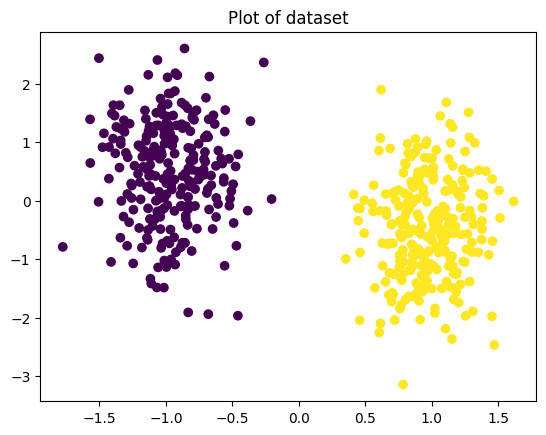

In [ ]:
import matplotlib.pyplot as plt

plt.title("Plot of dataset")
plt.scatter(X[:, 0], X[:, 1], c=y)

Let’s add few more points that challenges Perceptron, and without violating the non-linearity of the data.

In [ ]:
import numpy as np

a = np.array([[0.5,2]])
b = np.array([0])
X =np.concatenate((X, a))
y = np.concatenate((y, b))

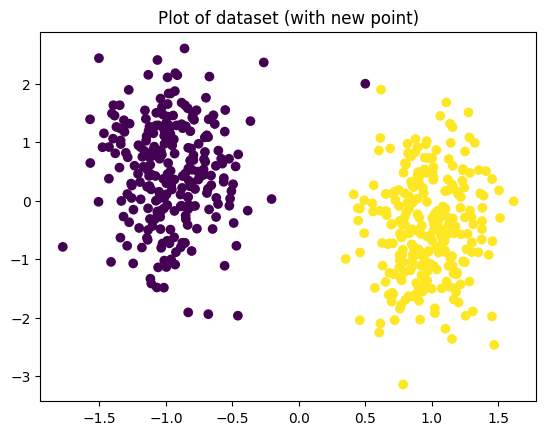

In [ ]:
plt.title("Plot of dataset (with new point)")
plt.scatter(X[:, 0], X[:, 1], c=y)

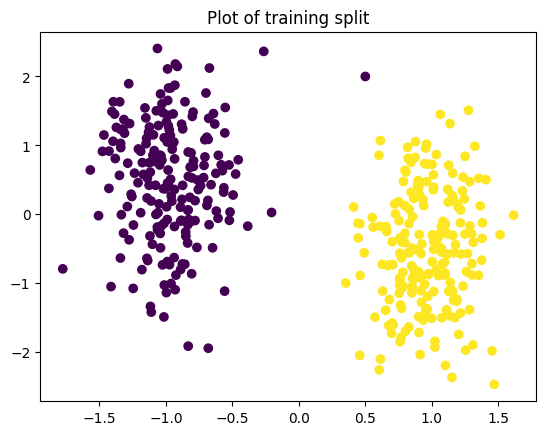

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=290)
plt.title("Plot of training split")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)


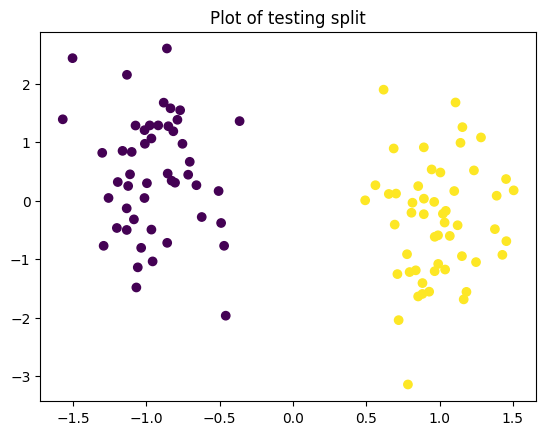

In [ ]:
plt.title("Plot of testing split")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

Perceptron learning

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

#Creating a classifier
classifier = Perceptron(max_iter=100, eta0=0.1, random_state=0)

#Training the model using classifier
classifier.fit(X_train, y_train)

#Getting cross validation score to predict the model accuracy
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9975 (+/- 0.0100)


Plot the boundary

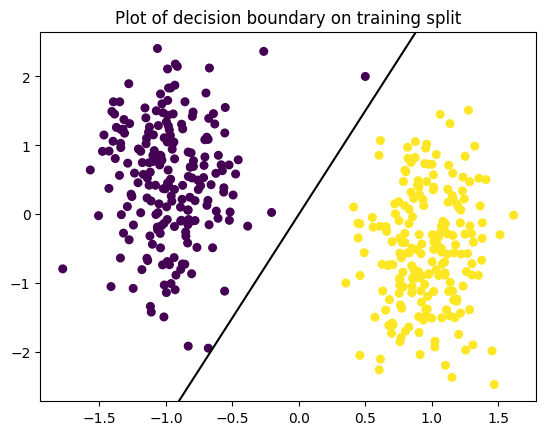

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30)
ax = plt.gca()
plt.title("Plot of decision boundary on training split")

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1, linestyles=['-'])

Now let's see prediction on testing set.

In [ ]:
from sklearn import metrics

y_pred = classifier.predict(X_test)

print("Accuracy: %0.4f"% metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9802


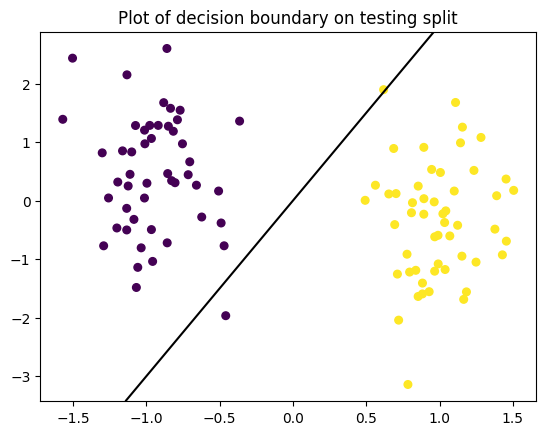

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30)
ax = plt.gca()
plt.title("Plot of decision boundary on testing split")

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1, linestyles=['-'])

We are get the accuracy of 0.9802. This means, the data being linearly separable, Perceptron is not able to properly classify the data out of the sample.

Compare with SVM

In [ ]:
from sklearn import svm

#Creating a classifier
classifier = svm.SVC(kernel="linear")

#Training the model using classifier
classifier.fit(X_train, y_train)

#Getting cross validation score to predict the model accuracy
scores = cross_val_score(classifier, X_train, y_train, cv=5)

print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9975 (+/- 0.0100)


In [ ]:
y_pred = classifier.predict(X_test)
print("Accuracy: %0.4f"% metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0000


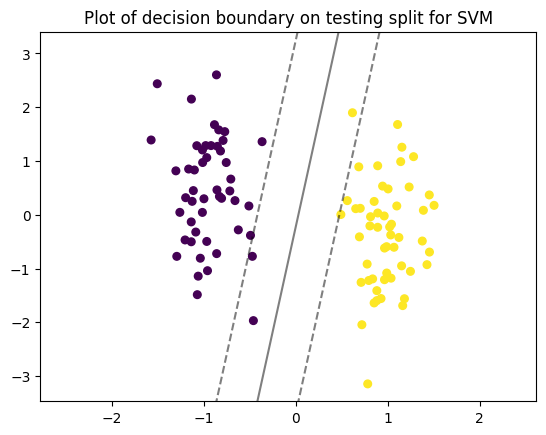

In [ ]:
# obtain the suport vectors
decision_function = classifier.decision_function(X_train)

support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X_train[support_vector_indices]

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30)
ax = plt.gca()
plt.title("Plot of decision boundary on testing split for SVM")

xlim = ax.get_xlim()
ylim = ax.get_ylim()

from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    classifier,
    X_train,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)

plt.show()

# Neural Network

We demonstrate neural networks using artificial color spiral data. This is a 2-D dataset where different points are colored differently, and the task is to predict the correct color based on the point location. So it is a basic decision task. However, in order to make the task reasonably complex, we introduce the colors in a spiral pattern. We create the data as follows:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
n = 800  # number of data points
x1 = np.random.normal(size=n)
x2 = np.random.normal(size=n)

X = np.column_stack((x1, x2))  # design matrix

alpha = np.arctan2(x2, x1)

r = np.sqrt(x1**2 + x2**2)
c1 = np.sin(3*alpha + 2*r)
c2 = np.cos(3*alpha + 2*r)

## partition the sum of a sin and cosine into 5 intervals
category = pd.cut(c1 + c2,
           bins=[-1.5, -1.1, -0.6, 0.6, 1.1, 1.5],
           labels=[1, 2, 3, 4, 5])
y = category.astype(int)

In [ ]:
set(y)

{1, 2, 3, 4, 5}

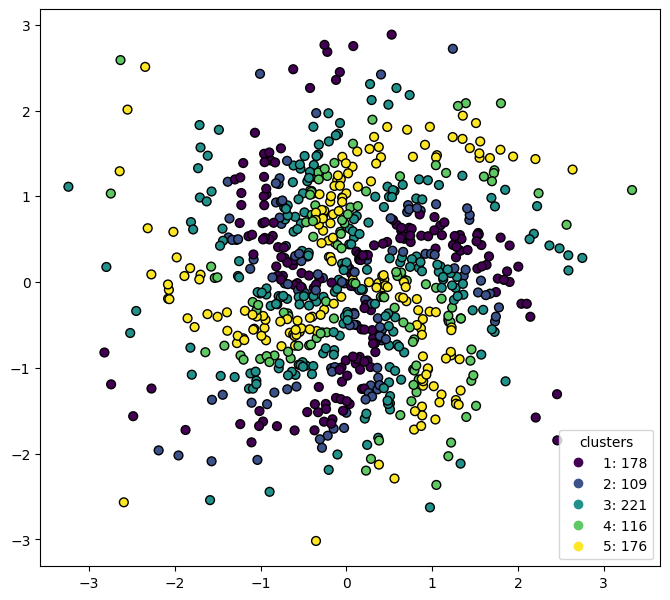

In [ ]:
from collections import Counter

plt.figure(figsize=(8,8))
ax = plt.axes()
points = ax.scatter(X[:,0], X[:,1], c=y, s=40, edgecolors='black')
ax.set_aspect("equal")
handles, _ = points.legend_elements()
labels =sorted([f'{item}: {count}' for item, count in Counter(y).items()])
ax.legend(handles, labels, loc = "lower right",title = 'clusters')
plt.show()

sklearn implements simple feed-forward neural networks, multi-layer perceptrons.

Let us now demonstrate the usage of MLPClassifier on the color spiral image data. Let us start with a simple perceptron with a single hidden layer of 20 nodes.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

m = MLPClassifier(hidden_layer_sizes = (20,), max_iter=10000)
_ = m.fit(X, y)
yhat = m.predict(X)
confusion_matrix(y, yhat)

array([[141,   1,  35,   1,   0],
       [ 50,   6,  52,   0,   1],
       [ 30,   6, 160,   3,  22],
       [  0,   0,  43,  11,  62],
       [  2,   1,  28,   4, 141]])

In [ ]:
np.mean(yhat == y)

0.57375

This is because it is too simple, just a single small hidden layer is not enough to model the complex spiral pattern well. Let’s also check to decision boundary plot to see how does the model represent the image:

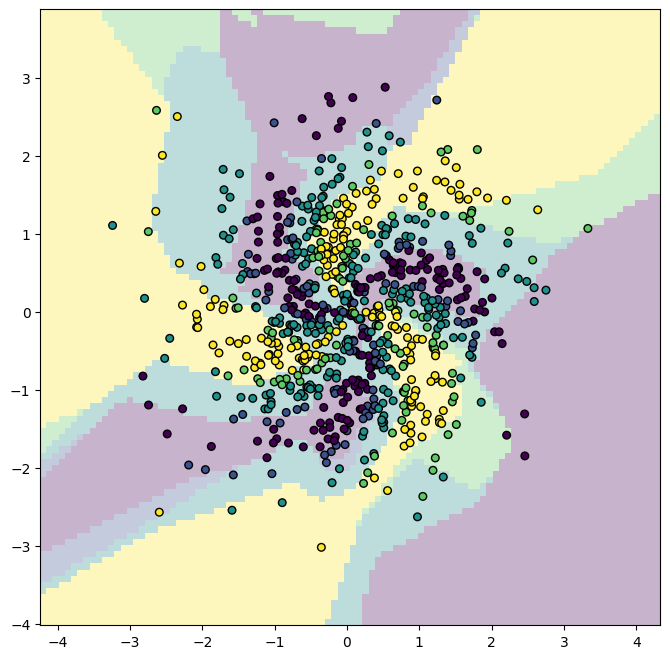

In [ ]:
def DBPlot(m, X, y, nGrid = 100):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nGrid),
                           np.linspace(x2_min, x2_max, nGrid))
    XX = np.column_stack((xx1.ravel(), xx2.ravel()))
    hatyy = m.predict(XX).reshape(xx1.shape)
    plt.figure(figsize=(8,8))
    _ = plt.imshow(hatyy, extent=(x1_min, x1_max, x2_min, x2_max),
                   aspect="auto",
                   interpolation='none', origin='lower',
                   alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='k')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

DBPlot(m, X, y)

We can see that the model correctly captures the idea: spirals of different colors, but the shape of spirals is not accurate enough.

Let us repeat the model with a more powerful network:

In [ ]:
m = MLPClassifier(hidden_layer_sizes = (256, 128, 64), max_iter=10000)
_ = m.fit(X, y)

yhat = m.predict(X)
confusion_matrix(y, yhat)


array([[177,   0,   0,   0,   1],
       [  1, 104,   4,   0,   0],
       [  0,   0, 220,   1,   0],
       [  0,   0,   0, 113,   3],
       [  0,   0,   0,   1, 175]])

In [ ]:
np.mean(yhat == y)

0.97125

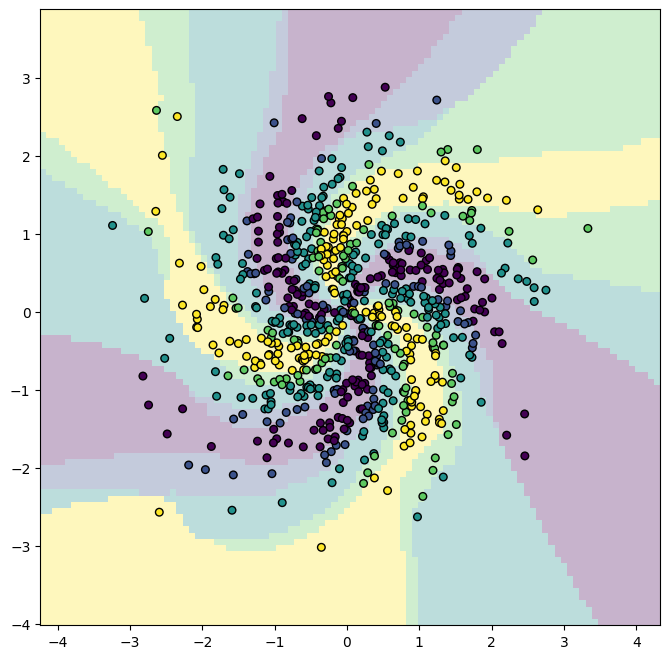

In [ ]:
DBPlot(m, X, y)

A visual inspection confirms that the more powerful neural network is quite good in capturing the overall model structure.



# Using Tensorflow with Keras

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

## Load a dataset
Load the MNIST dataset with the following arguments:

- `shuffle_files=True`: The MNIST data is only stored in a single file, but for larger datasets with multiple files on disk, it's good practice to shuffle them when training.
- `as_supervised=True`: Returns a tuple `(img, label)` instead of a dictionary `{'image': img, 'label': label}`.

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


## Build a training pipeline
Apply the following transformations:

- `tf.data.Dataset.map`: TFDS provide images of type `tf.uint8`, while the model expects `tf.float32`. Therefore, you need to normalize images.
-` tf.data.Dataset.cache` As you fit the dataset in memory, cache it before shuffling for a better performance.
Note: Random transformations should be applied after caching.
- `tf.data.Dataset.shuffle`: For true randomness, set the shuffle buffer to the full dataset size.
Note: For large datasets that can't fit in memory, use buffer_size=1000 if your system allows it.
- `tf.data.Dataset.batch`: Batch elements of the dataset after shuffling to get unique batches at each epoch.
- `tf.data.Dataset.prefetch`: It is good practice to end the pipeline by prefetching for performance.

Similiarly doing the testing, but no need shuffle.

In [ ]:
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

Setup and compile model

The three most important arguments are

- `loss` describes the model loss function, `sparse_categorical_crossentropy`, essentially log-likelihood, is suitable for categorization tasks. The exact type also depends on how exactly is the outcome coded.
- `optimizer` is the optimizer to use for stochastic gradient descent. `adam` and `rmsprop` are good choices but there are other options.
- `metrics` is a metric to be evaluated and printed while optimizing, offering some feedback about how the evaluation is going.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 2s 3ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.9032 - val_loss: 0.1936 - val_sparse_categorical_accuracy: 0.9429
Epoch 2/6
469/469 [==============================] - 1s 3ms/step - loss: 0.1633 - sparse_categorical_accuracy: 0.9535 - val_loss: 0.1355 - val_sparse_categorical_accuracy: 0.9595
Epoch 3/6
469/469 [==============================] - 1s 3ms/step - loss: 0.1172 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.1166 - val_sparse_categorical_accuracy: 0.9641
Epoch 4/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0909 - sparse_categorical_accuracy: 0.9742 - val_loss: 0.1020 - val_sparse_categorical_accuracy: 0.9686
Epoch 5/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0734 - sparse_categorical_accuracy: 0.9787 - val_loss: 0.0866 - val_sparse_categorical_accuracy: 0.9733
Epoch 6/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0610 - sparse_categorical_accu

In [ ]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history.history

{'loss': [0.3519502878189087,
  0.16334275901317596,
  0.1171829029917717,
  0.09088285267353058,
  0.07343760877847672,
  0.06098475679755211],
 'sparse_categorical_accuracy': [0.9032333493232727,
  0.9535166621208191,
  0.9664166569709778,
  0.9742000102996826,
  0.9786999821662903,
  0.9825666546821594],
 'val_loss': [0.19363410770893097,
  0.1355062574148178,
  0.11655215919017792,
  0.1019686758518219,
  0.08660893887281418,
  0.07841017842292786],
 'val_sparse_categorical_accuracy': [0.9429000020027161,
  0.9595000147819519,
  0.9641000032424927,
  0.9685999751091003,
  0.9732999801635742,
  0.9771000146865845]}

In [ ]:
print("Evaluate on test data")
results = model.evaluate(ds_test, batch_size=10)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 0s 2ms/step - loss: 0.0784 - sparse_categorical_accuracy: 0.9771
test loss, test acc: [0.07841017842292786, 0.9771000146865845]


In [ ]:
p_hat = model.predict(ds_test)

79/79 [==============================] - 0s 1ms/step


In [ ]:
p_hat[:1]

array([[-8.539205 , -2.2358625, 12.133507 ,  2.1175866, -1.0407321,
        -7.1655283, -3.0938737, -2.6877084, -2.1617582, -5.1778064]],
      dtype=float32)

In [ ]:
y_hat = np.argmax(p_hat, axis=-1)
y_hat[:5]

array([2, 0, 4, 8, 7])